## 4.2 손실 함수 loss function

### 4.2.1 평균 제곱 오차 MSE

In [ ]:
import numpy as np

In [ ]:
def mean_squared_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(mean_squared_error(np.array(y), np.array(t)))

0.09750000000000003
0.5975


### 4.2.2 교차 엔트로피 오차 CEE

In [ ]:
def cross_entropy_error(y, t):
  delta = 1e-7 # y값이 0일때 - 무한대의 값을 갖지 못하게 만듦
  return -np.sum(t * np.log(y + delta))

In [ ]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

0.510825457099338
2.302584092994546


### 4.2.3 미니배치 학습

In [ ]:
import numpy as np
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000, 10)


- train data: 60000개 784 = 28 X 28

- train data's label(정답 레이블): 60000개 10

In [ ]:
train_size = x_train.shape[0] # 60000
batch_size = 10

batch_mask = np.random.choice(train_size, batch_size) # 0~train_size(60000)까지 수 중에서 batch_size(10)개의 난수
# print(batch_mask)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

[11268 41518 56841   434 51761 21361 33108 31189 57161 16085]


In [ ]:
print(x_batch)
print(t_batch)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 4.2.4 교차 엔트로피 함수 + 미니배치 
- 기존 CEE는 데이터 하나를 대상으로 구현
- 데이터 하나 & 데이터 배치 두 입력 경우 모두를 고려

In [ ]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.shape(1, t.size)
    y = y.shape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y[np.arange(batch_size), t])) / batch_size

In [ ]:
x_batch.shape[0] # 위의 예시인 경우 batch_size = 10

10

## 4.3 수치 미분 numerical differentiation

### 4.3.1 미분

In [ ]:
def numerical_diff_wrong(f, x):
  h = 10e-50
  return (f(x + h) - f(x)) / h  # 반올림 오차 발생 (차분)

In [ ]:
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x + h) - f(x - h)) / (2*h) # 중앙 차분

### 4.3.2 수치 미분

In [ ]:
def function_1(x):
  return 0.01*x**2 + 0.1*x

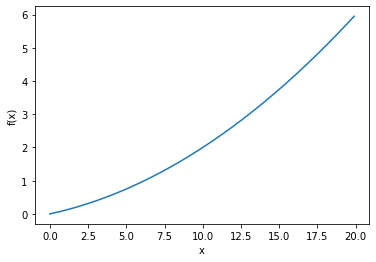

In [ ]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [ ]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))
print(numerical_diff_wrong(function_1, 5))
print(numerical_diff_wrong(function_1, 10))

0.1999999999990898
0.2999999999986347
0.0
0.0


0.1999999999990898


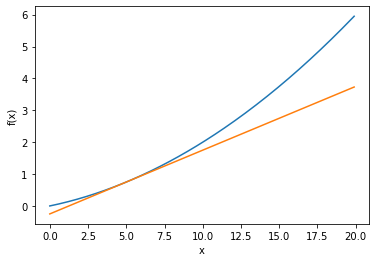

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

def function_1(x):
    return 0.01*x**2 + 0.1*x 

def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

### 4.3.3 편미분

In [ ]:
def function_2(x):
  return x[0]**2 + x[1]**2 # np.sum(x**2)

In [ ]:
def function_tmp1(x0):
  return x0**2 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [ ]:
def function_tmp2(x1):
  return 3.0**2 + x1**2

numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 4.4 기울기 gradient
- 모든 변수의 편미분을 벡터로 정리

In [6]:
def numerical_gradient(f, x):
  h = 1e-4
  grad = np.zeros_like(x)

  for idx in range(x.size):
    tmp_val = x[idx]

    # f(x+h)
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # f(x-h)
    x[idx] = tmp_val - h
    fxh2 = f(x)

    grad[idx] = (fxh1 - fxh2) / (2*h)
    x[idx] = tmp_val # 값 복원

  return grad

In [ ]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

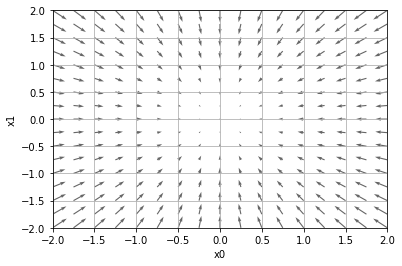

In [8]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val  
        
    return grad

def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()

    grad = numerical_gradient(function_2, np.array([X, Y]).T).T

    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

- 기울기가 가리키는 쪽 (벡터) = 각 장소에서 출력 값을 가장 줄이는 방향

### 4.4.1 경사 하강법

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  
  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr * grad
  return x

In [ ]:
def function_2(x):
  return np.sum(x**2)

init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=10.0, step_num=100)) # 학습률 너무 크면 큰 값으로 발산
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x, lr=1e-10, step_num=100)) # 학습률 너무 작으면 갱신 전 종료

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


=> 학습률 (**하이퍼파라미터**) 값 설정의 중요성

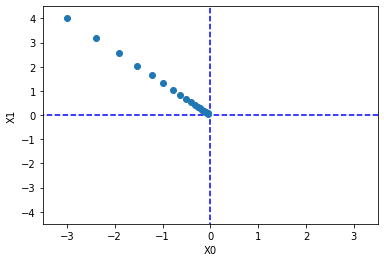

In [ ]:
import numpy as np
import matplotlib.pylab as plt

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

### 4.4.2 신경망에서의 기울기

In [4]:
import numpy as np

In [1]:
def softmax(x):
    x = x - np.max(x, axis=-1, keepdims=True)   
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

In [2]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [10]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [14]:
net = simpleNet()
print(net.W)

[[ 0.56030791 -0.08383495  1.73463084]
 [ 1.10813831  1.07720778 -0.22676638]]


In [15]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[1.33350922 0.91918603 0.83668876]


In [16]:
np.argmax(p) # 최댓값의 인덱스

0

In [18]:
t = np.array([0, 0, 1])
net.loss(x, t)

1.3162692777071552

In [19]:
def f(w):
  return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.26440449  0.17471514 -0.43911963]
 [ 0.39660674  0.26207272 -0.65867945]]


## 4.5 학습 알고리즘 구현하기
- 미니배치
- 기울기 산출
- 매개변수 갱신
- 반복

### 4.5.1 2층 신경망 클래스 

In [20]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [24]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size,
               weight_init_std=0.01):
    self.params = {}
    self.params['W1'] = weight_init_std * np.random.rand(input_size, hidden_size)
    self.params['b1'] = np.zeros(hidden_size)
    self.params['W2'] = weight_init_std * np.random.rand(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, x):
    W1, W2 = self.params['W1'], self.params['W2']
    b1, b2 = self.params['b1'], self.params['b2']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    y = softmax(a2)

    return y

  def loss(self, x, t):
    y = self.predict(x)

    return cross_entropy_error(y, t)

  def accuracy(self, x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy

  def numerical_gradient(self, x, t):
    loss_W = lambda W : self.loss(x, t)

    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
    grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
    grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
    grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

    return grads

In [26]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [29]:
x = np.random.rand(100, 784)
y = net.predict(x)
print(y)
print(y.shape)

[[0.09994751 0.10215492 0.09985324 0.09796032 0.09949981 0.09839576
  0.09944754 0.10150751 0.1001323  0.10110109]
 [0.09994886 0.10220406 0.09985201 0.09793549 0.09950196 0.09835921
  0.09943627 0.10152045 0.10013449 0.10110721]
 [0.09994196 0.10218911 0.09985304 0.09793733 0.09949894 0.0983862
  0.09944793 0.10151476 0.10013707 0.10109366]
 [0.09994766 0.10218242 0.09986401 0.09794828 0.09948193 0.09837295
  0.09944601 0.101528   0.10012799 0.10110074]
 [0.09994002 0.10218449 0.09986885 0.0979482  0.09949489 0.0983793
  0.09943632 0.10151003 0.10014231 0.10109561]
 [0.09993869 0.10219277 0.09985558 0.0979432  0.09949567 0.0983656
  0.09943284 0.10151842 0.10014648 0.10111075]
 [0.099946   0.10217107 0.09985859 0.09795843 0.09949998 0.09838863
  0.09943354 0.1015099  0.10014307 0.10109079]
 [0.09994988 0.10217784 0.09985919 0.09795327 0.09949829 0.09837332
  0.09943762 0.10150978 0.10012946 0.10111136]
 [0.09994854 0.10219578 0.09985719 0.09792742 0.0994943  0.09837986
  0.0994491  0.

### 4.5.2 미니배치 학습 구현

In [31]:
from mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [36]:
train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [37]:
for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

KeyboardInterrupt: ignored

### 4.5.3 시험 데이터로 평가

In [38]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []
iter_per_epoch = max(train_size / batch_size, 1)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in range(iters_num):
  batch_mask = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_mask]
  t_batch = t_train[batch_mask]

  # 기울기 계산
  grad = network.numerical_gradient(x_batch, t_batch)

  # 매개변수 갱신
  for key in ('W1', 'b1', 'W2', 'b2'):
    network.params[key] -= learning_rate * grad[key]

  # 학습 경과 기록
  loss = network.loss(x_batch, t_batch)
  train_loss_list.append(loss)

  # 1epoch 당 정확도 계산
  if i % iter_per_epoch == 0:
    train_acc = network.accuracy(x_train, t_train)
    test_acc = network.accuracy(x_test, t_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    print("train acc, test acc : " + str(train_acc) + ", " + str(test_acc))

train acc, test acc : 0.09035, 0.0892


KeyboardInterrupt: ignored